In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import acquire as a
import prepare as p
import model as m
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = a.acquire_readmes()
df = p.prep_df_for_nlp(df,'readme_contents')
train,validate,test = p.split_data(df,'language')

In [3]:
reload(m)
# train_x,train_y,valid_x,valid_y,test_x,test_y = m.get_features_and_target(train, validate,test)
xg_boost,random_forest, decision_tree = m.create_models()

In [4]:
reload(m)
train_x,train_y,valid_x,valid_y,test_x,test_y = m.get_features_and_target(train, validate,test)

In [5]:
m.compare_models(train_x,train_y,valid_x,valid_y,decision_tree,random_forest,xg_boost)

running Decision Tree on train
Running decision tree on validate
Running random forest on train
running random forest on validate
running xgboost on train
running xgboost on validate


,Decision Tree,Random Forest,Gradient Boosting
Train,0.989130,0.740942,0.998188
Validate,0.494118,0.441176,0.623529


0.6953125

<Figure size 640x480 with 0 Axes>

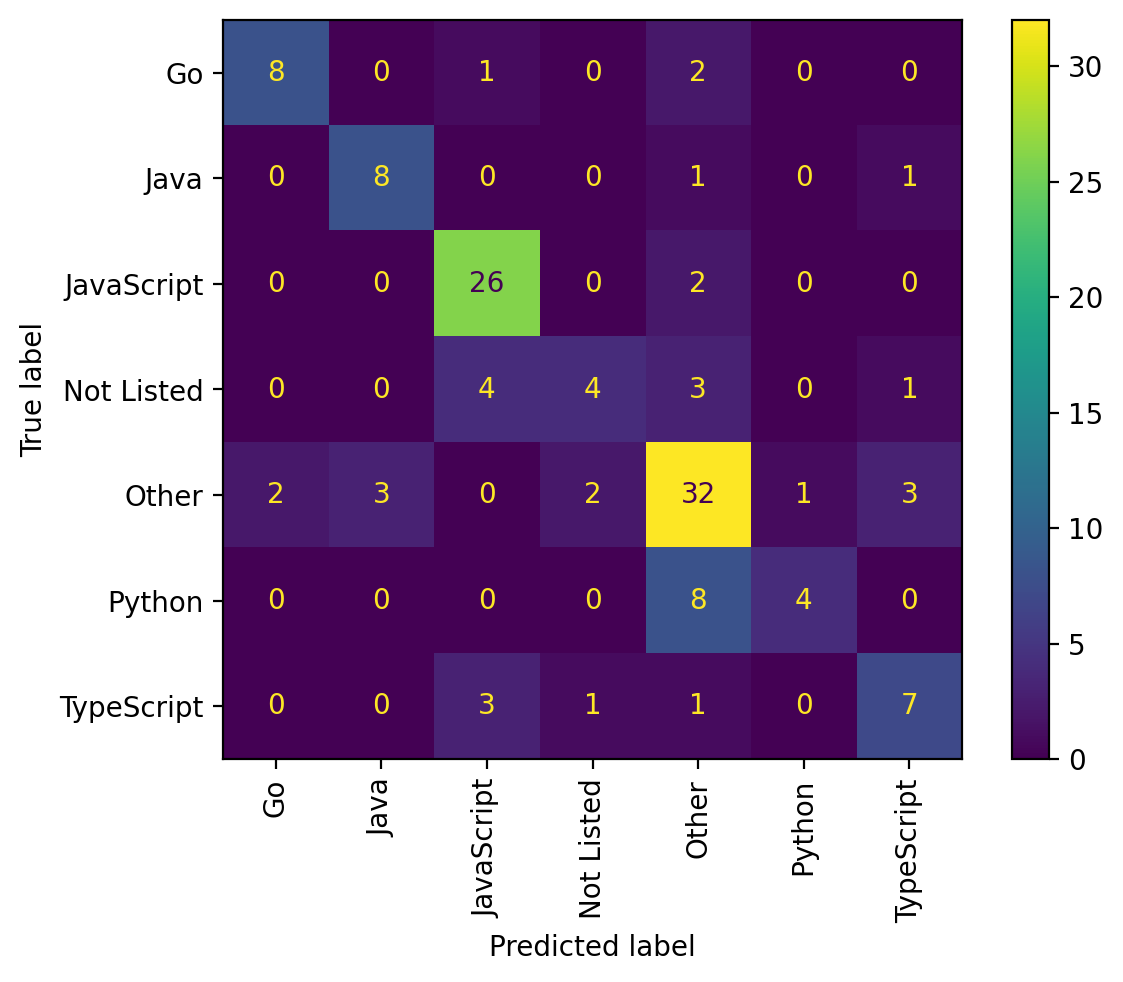

In [9]:
from sklearn.metrics import accuracy_score
m.run_test(test_x,test_y,xg_boost)
yhat_test = xg_boost.predict(test_x)
accuracy_score(test_y,yhat_test)